In [3]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#import matplotlib

#matplotlib.rcParams['font.family'] = 'Malgun Gothic'   # '맑은 고딕'으로 설정 
#matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
depart = pd.read_csv('C:\\Users\\ASIAE_24\\Documents\\data\\X_train_new.csv', encoding='cp949')

In [5]:
depart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036653 entries, 0 to 1036652
Data columns (total 17 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   custid      1036653 non-null  int64  
 1   sales_date  1036653 non-null  object 
 2   sales_time  1036653 non-null  int64  
 3   str_nm      1036653 non-null  object 
 4   goodcd      1036653 non-null  float64
 5   brd_nm      1036653 non-null  object 
 6   corner_nm   1036653 non-null  object 
 7   pc_nm       1036653 non-null  object 
 8   part_nm     1036653 non-null  object 
 9   team_nm     1036653 non-null  object 
 10  buyer_nm    1036653 non-null  object 
 11  import_flg  1036653 non-null  int64  
 12  tot_amt     1036653 non-null  int64  
 13  dis_amt     1036653 non-null  int64  
 14  net_amt     1036653 non-null  int64  
 15  inst_mon    1036653 non-null  int64  
 16  inst_fee    1036653 non-null  int64  
dtypes: float64(1), int64(8), object(8)
memory usage: 134.5+ MB


In [6]:
np.random.seed(42)

In [7]:
#dc_rate 할인율 만들기
dc_rate = round((depart['dis_amt']/depart['tot_amt'])*100)
depart['dc_rate'] = dc_rate


# datetime 사용 시간변수 생성

In [8]:
import datetime

In [9]:
d = []
for i in range(len(depart)):
    d.append(datetime.datetime.strptime(depart['sales_date'][i], '%Y-%m-%d %H:%S' ))


# 월(sales_date_mon)

In [10]:
mon = []
for i in range(len(depart)):
    mon.append(d[i].month)
depart['sales_date_mon'] = mon

# 일(sales_date_day)

In [11]:
day = []
for i in range(len(depart)):
    day.append(d[i].day)
depart['sales_date_day'] = day

# 요일(sales_date_wday) 0~6 = 월화수목금토일

In [12]:
wday = []
for i in range(len(depart)):
    wday.append(d[i].weekday())
depart['sales_date_wday'] = wday

# 할부요인 변수 생성

In [13]:
 #inst_tot / 무이자 할부 = 1/ 유이자 할부 = 2/ 일시불  = 3

In [14]:
inst_tot = [3 if(i==1) else 1 if(i > 1 and j==0) else 2 for i,j in zip(depart['inst_mon'], depart['inst_fee'])]
depart['inst_tot'] = inst_tot

In [15]:
depart.tail()

,custid,sales_date,sales_time,str_nm,goodcd,brd_nm,corner_nm,pc_nm,part_nm,team_nm,...,tot_amt,dis_amt,net_amt,inst_mon,inst_fee,dc_rate,sales_date_mon,sales_date_day,sales_date_wday,inst_tot
1036648,29998,2001-01-21 0:00,1320,무역점,4.241080e+12,바닐라,영캐주얼,트랜디 케쥬얼,여성캐주얼,의류패션팀,...,120000,0,120000,3,0,0.0,1,21,6,1
1036649,29998,2001-04-07 0:00,1633,무역점,2.139140e+12,랑콤,수입종합화장품,화장품,명품잡화,잡화가용팀,...,38000,1900,36100,1,0,5.0,4,7,5,3
1036650,29999,2001-03-21 0:00,1803,천호점,4.109290e+12,루이까또즈,핸드백,핸드백,잡화,잡화가용팀,...,46000,2300,43700,1,0,5.0,3,21,2,3
1036651,29999,2001-03-29 0:00,1823,천호점,4.139350e+12,소피에르핀,넥타이,셔츠,남성의류,의류패션팀,...,49000,2450,46550,1,0,5.0,3,29,3,3
1036652,29999,2001-04-21 0:00,1313,천호점,4.104840e+12,샤넬,수입종합화장품,화장품,잡화,잡화가용팀,...,52000,2600,49400,1,0,5.0,4,21,5,3


In [17]:
depart['dc_rate'].value_counts()

0.0     549242
5.0     401904
10.0     74728
3.0       3873
2.0       2240
4.0       2183
1.0       1879
8.0        176
7.0        156
6.0        143
9.0        121
20.0         5
65.0         2
40.0         1
Name: dc_rate, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(depart, test_size=0.2, random_state=42)

In [28]:
train_set.head()

,custid,sales_date,sales_time,str_nm,goodcd,brd_nm,corner_nm,pc_nm,part_nm,team_nm,buyer_nm,import_flg,tot_amt,dis_amt,net_amt,inst_mon,inst_fee,dc_rate
904814,26076,2000-10-15 0:00,1730,신촌점,4.417750e+12,베이비헤로스,미확인코너,아동,아동문화,잡화가용팀,유아동복,0,79200,0,79200,3,0,0.0
812664,23456,2000-08-19 0:00,1730,신촌점,4.507920e+12,팩.게임CD,완구,문화,아동문화,잡화가용팀,문화완구,0,59000,0,59000,3,0,0.0
59385,1721,2001-01-21 0:00,1930,본점,4.104840e+12,샤넬,수입종합화장품,화장품,잡화파트,잡화가용팀,화장품,1,54000,2700,51300,1,0,5.0
536933,15384,2000-11-19 0:00,1723,신촌점,2.139140e+12,랑콤,색조화장품,화장품,패션잡화,잡화가용팀,화장품,0,76000,3800,72200,1,0,5.0
11582,335,2000-06-14 0:00,1253,천호점,4.120440e+12,베네통토탈,토탈,핸드백,잡화,잡화가용팀,피혁B,0,5300,270,5030,1,0,5.0


<AxesSubplot:>

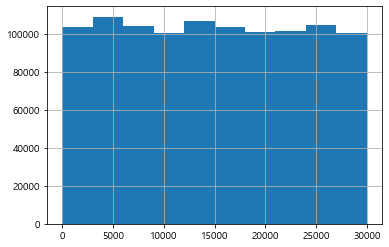